# <center><font color='magenta'>**Python for DA1**</font></center>
### <center>Central European University, 2024-2025</center>
# <center>Class 4</center>

## Pandas

In [3]:
import pandas as pd
import numpy as np

In [5]:
import warnings
warnings.filterwarnings('ignore')

`Pandas dataframes` are your tool for working with tabular data. Take it as a programmable version of an Excel sheet. The problem with Excel is that it is too good so it is difficult to motivate users to try something new. Despite its flexibility and user-friendly interface Excel does have limitations, which Pandas can solve. 

Pandas started out as the Python version of R dataframes. Now it has its own ecosystem.

### Pandas Series

Pandas is a columnar structure where each column is essentially a `Pandas Series`. They are strictly 1-dimensional and can contain any data type (integers, strings, floats, objects, etc), including a mix of them. Series can be created from a scalar, a list, ndarray or dictionary using `pd.Series()` (note the captial **“S”**).

By default, series are labelled with indices starting from 0. For example:

In [7]:
s = pd.Series(data = [-5, 1.3, 21, 6, 3])

In [9]:
s

0    -5.0
1     1.3
2    21.0
3     6.0
4     3.0
dtype: float64

But you can add a custom index:

In [11]:
pd.Series(data = [-5, 1.3, 21, 6, 3],
          index = ['a', 'b', 'c', 'd', 'e'])

a    -5.0
b     1.3
c    21.0
d     6.0
e     3.0
dtype: float64

Create a series from a dictionary. Your keys are the indices, and your values are yor series values.

In [13]:
pd.Series(data = {'a': 10, 'b': 20, 'c': 30})

a    10
b    20
c    30
dtype: int64

A Pandas series can have a heterogenous data strucure.

In [17]:
pd.Series([1, 'a', 2.0, np.random.rand(1)])

0           1
1           a
2         2.0
3    0.141204
dtype: object

Question: How can I modify the function above to have the random number itself instead of a numpy array as the last value of the series?

In [19]:
pd.Series([1, 'a', 2.0, np.random.rand(1)[0] ])

0           1
1           a
2         2.0
3    0.126683
dtype: object

### Pandas DataFrames

 `DataFrames` are really just Series stuck together! Think of a DataFrame as a dictionary of series, with the _“keys”_ being the column labels and the _“values”_ being the series data.

#### Creating DataFrames

Dataframes can be created using `pd.DataFrame()` (note the capital “D” and “F”). Like series, index and column labels of dataframes are labelled starting from 0 by default. Note that we are using a _list of lists_ as the data input.

In [21]:
pd.DataFrame([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


Add `index` and `column` names.

In [23]:
pd.DataFrame([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]],
             index = ["R1", "R2", "R3"],
             columns = ["C1", "C2", "C3"])

,C1,C2,C3
R1,1,2,3
R2,4,5,6
R3,7,8,9


Use  _dictionary_ as input.

In [25]:

pd.DataFrame(
    {
        "C1": [1, 2, 3],
        "C2": ['A', 'B', 'C']
    } 
    ,     index=["R1", "R2", "R3"]
)

,C1,C2
R1,1,A
R2,2,B
R3,3,C


#### Slicing and indexing

There are several main ways to select data from a DataFrame:

- []
- .loc[]
- .iloc[]
- Boolean indexing
- .query()

In [27]:
df = pd.DataFrame(
    {
        "Name": ["Tom", "Mike", "Tiffany"],
        "Language": ["Python", "Python", "R"],
        "Courses": [5, 4, 7]
    })
df

,Name,Language,Courses
0,Tom,Python,5
1,Mike,Python,4
2,Tiffany,R,7


**Using `[]`**

In [30]:
df['Name']  # returns a series

0        Tom
1       Mike
2    Tiffany
Name: Name, dtype: object

In [32]:
df[['Name']]  # returns a dataframe!

,Name
0,Tom
1,Mike
2,Tiffany


In [34]:
df[['Name', 'Language']]

,Name,Language
0,Tom,Python
1,Mike,Python
2,Tiffany,R


In [36]:
df[0:1] 

,Name,Language,Courses
0,Tom,Python,5


In [38]:
df[:1] 

,Name,Language,Courses
0,Tom,Python,5


In [40]:
df[1:] 

,Name,Language,Courses
1,Mike,Python,4
2,Tiffany,R,7


**Indexing with `.loc` and `.iloc`**

Pandas created the methods `.loc[]` and `.iloc[]` as more flexible alternatives for accessing data from a dataframe. Use `df.iloc[]` for _indexing with integers_ and `df.loc[]` for _indexing with labels_.

In [42]:
df.iloc[0]  # returns a series

Name           Tom
Language    Python
Courses          5
Name: 0, dtype: object

In [44]:
df.iloc[0:2]  # slicing returns a dataframe

,Name,Language,Courses
0,Tom,Python,5
1,Mike,Python,4


In [46]:
df.iloc[2, 1]  # returns the indexed object

'R'

In [48]:
df.iloc[[0, 1], [1, 2]]  # returns a dataframe

,Language,Courses
0,Python,5
1,Python,4


In [50]:
df.loc[:, 'Name'] # series

0        Tom
1       Mike
2    Tiffany
Name: Name, dtype: object

In [52]:
df.loc[:, ['Name']] # dataframe

,Name
0,Tom
1,Mike
2,Tiffany


In [54]:
df.loc[:, ['Name','Language', 'Language']]

,Name,Language,Language
0,Tom,Python,Python
1,Mike,Python,Python
2,Tiffany,R,R


In [56]:
df.loc[[0, 2], ['Language', 'Courses']]

,Language,Courses
0,Python,5
2,R,7


Get `index` and `column` names

In [58]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [60]:
df.index

RangeIndex(start=0, stop=3, step=1)

You can also redeine the vaules of the index by overwriting the dataframe's `index` attribute.

In [62]:
df.index = [3,4,5]

In [64]:
df

,Name,Language,Courses
3,Tom,Python,5
4,Mike,Python,4
5,Tiffany,R,7


In [66]:
df.index

Index([3, 4, 5], dtype='int64')

In [68]:
type(df.index)

pandas.core.indexes.base.Index

In [70]:
df.columns

Index(['Name', 'Language', 'Courses'], dtype='object')

In [72]:
type(df.columns)

pandas.core.indexes.base.Index

**Boolean indexing**

In [74]:
df[df['Courses'] > 5]

,Name,Language,Courses
5,Tiffany,R,7


In [85]:
df[(df['Name'] == "Tom") & (df.Language == 'Python')]

,Name,Language,Courses
3,Tom,Python,5


In [78]:
df['Name'] == 'Tom'

3     True
4    False
5    False
Name: Name, dtype: bool

**Indexing with `.query()`**

In [87]:
df.query("Courses > 4 & Language == 'Python'") # note the mixed use of double and single quotes. Why is that? 

,Name,Language,Courses
3,Tom,Python,5


Query also allows you to reference variable in the current workspace using the `@` symbol:

In [89]:
course_threshold = 4
df.query("Courses > @course_threshold")

,Name,Language,Courses
3,Tom,Python,5
5,Tiffany,R,7


### Reading and inspecting data

In [91]:
df = pd.read_csv('titanic.csv')

In [97]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [99]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,...,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,...,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,...,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,...,C,702.0,"Butrus-Youssef, Master Makhkhul",4.0,"Sar'al[81], Syria",Cherbourg,"Detroit, Michigan, US",D,NaN,3.0


The `.T` attribute (also available as the transpose() method) helpy you to inspect rows with many columns.

In [101]:
# closer look at a few rows
df.iloc[0:2].T

,0,1
PassengerId,1,2
Survived,0.0,1.0
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22.0,38.0
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

- Pclass: passenger class
- SibSp: number of siblings & spouses aboard
- Parch: number of parents & children aboard
- Fare: ticket price
- Cabin: room id, if any
- Embarked: port of departure (Cherbourg, Queenstown, Southampton)

In [105]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292
WikiId,1304.0,658.534509,380.377373,1.00,326.7500,661.5000,987.250,1314.0000
Age_wiki,1302.0,29.415829,13.758954,0.17,21.0000,28.0000,37.750,74.0000
Class,1304.0,2.291411,0.840852,1.00,1.7500,3.0000,3.000,3.0000


#### Some simple metrics

There are two ways to access individual columns:
```python
df['Survived'] # refer it as a column name in brakcets
df.Survived # refer it as an attribute of the dataframe
```

In [109]:
df.Survived.value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [111]:
df.Class.value_counts()

Class
3.0    706
1.0    326
2.0    272
Name: count, dtype: int64

In databases, 'Class' is a *dimension* and 'Survivied' is a *metric*. You can aggregate *metrics* by *dimensions*. In databases these aggregations are done through a `GROUP BY` caluse. `groupby` is also availabel in Pandas.

In [113]:
df.groupby(by = 'Class')['Survived'].mean()

Class
1.0    0.631336
2.0    0.472527
3.0    0.240816
Name: Survived, dtype: float64

In [115]:
df.groupby(by = 'Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [122]:
df.groupby(by = ['Class', 'Sex'])['Survived'].mean()

Class  Sex   
1.0    female    0.968421
       male      0.368852
2.0    female    0.920000
       male      0.158879
3.0    female    0.496503
       male      0.135447
Name: Survived, dtype: float64

In [126]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1305,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1306,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1307,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [128]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

Let's assume that where 'Survived' is missing then the person did not survive. We can now replace missing values with zero (did not survive). The `inplace` clause modifies the dataframe *inplace*. It means that Pandas DataFrames are *mutable*

In [130]:
df.Survived.fillna(0, inplace = True)

In [132]:
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

In [134]:
df.groupby(by = ['Class', 'Sex'])['Survived'].mean()

Class  Sex   
1.0    female    0.638889
       male      0.247253
2.0    female    0.657143
       male      0.101796
3.0    female    0.331776
       male      0.095528
Name: Survived, dtype: float64

In [143]:
df.groupby(["Pclass"]).agg({"Fare": [np.mean, np.var], "Age": np.mean})

Fare                     Age
             mean          var       mean
Pclass                                   
1       87.508992  6471.748488  39.159930
2       21.179196   185.153771  29.506705
3       13.302889   132.120276  24.816367

You can use `map()` to format the numbers in the dataframe.

In [138]:
df.groupby(["Pclass"]).agg({"Fare": [np.mean, np.var], "Age": np.mean}).map('{:,.1f}'.format)

Fare            Age
        mean      var  mean
Pclass                     
1       87.5  6,471.7  39.2
2       21.2    185.2  29.5
3       13.3    132.1  24.8

#### Filtering

In [145]:
df[df.Embarked == 'C'] # embarked is Cherbourg

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,520.0,"Nassr Allah, Mrs. Adal (née Akim)[62][77]",14.0,"Zahlé, Lebanon, Ottoman Empire",Cherbourg,"Cleveland, Ohio, US",?,NaN,2.0
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,...,C,1053.0,"Muslamani, Mrs. Fatimah",22.0,"Tebnine, Lebanon",Cherbourg,"Michigan City, Indiana, US",C,NaN,3.0
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,...,C,1205.0,"Shihab, Mr. Amir Faris",25.0,"Hadath, Lebanon",Cherbourg,New York City,NaN,NaN,3.0
30,31,0.0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,...,C,302.0,"Uruchurtu, Don Manuel E.",40.0,"Mexico City, Mexico",Cherbourg,"Mexico City, Mexico",NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1296,0.0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,...,C,122.0,"Frauenthal, Mr. Isaac Gerald",43.0,"London, England, UK",Southampton,"New York, New York, US",5,NaN,1.0
1296,1297,0.0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,...,C,218.0,"Nourney, Mr. Alfred[71][72]",20.0,"Cologne, German Empire[note 2]",Cherbourg,"New York, New York, US",7,NaN,1.0
1298,1299,0.0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,...,C,316.0,"Widener, Mr. George Dunton",50.0,"Philadelphia, Pennsylvania, US",Southampton,"Philadelphia, Pennsylvania, US",NaN,NaN,1.0
1305,1306,0.0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,...,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0


In [147]:
df[(df.Embarked == 'C') & (df.Pclass == 3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,...,C,1053.0,"Muslamani, Mrs. Fatimah",22.0,"Tebnine, Lebanon",Cherbourg,"Michigan City, Indiana, US",C,NaN,3.0
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,...,C,1205.0,"Shihab, Mr. Amir Faris",25.0,"Hadath, Lebanon",Cherbourg,New York City,NaN,NaN,3.0
36,37,1.0,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,...,C,998.0,"Mamee, Mr. Hanna",20.0,"Tripoli, Lebanon",Cherbourg,"Philadelphia, Pennsylvania, US",15,NaN,3.0
39,40,1.0,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,...,C,1071.0,"Niqula-Yarid, Miss Jamilah",14.0,"El-Hakour, Lebanon",Cherbourg,"Jacksonville, Florida, US",C,NaN,3.0
42,43,0.0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,...,C,946.0,"Kraeff, Mr. Theodor",NaN,"Vetren, Bulgaria",Cherbourg,"Madison, Wisconsin, US",NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,1229,0.0,3,"Elias, Mr. Joseph",male,39.0,0,2,2675,7.2292,...,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1230,1231,0.0,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,...,C,1188.0,"Sa'maan, Master Butrus",10.0,"Hardîne, Lebanon",Cherbourg,"Wilkes Barre, Pennsylvania, US",NaN,NaN,3.0
1238,1239,0.0,3,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,...,C,893.0,"Jirjis, Mrs. Shaniini (née Whabee Abi-Saab)",22.0,"Youngstown, Ohio, US",Cherbourg,"Youngstown, Ohio, US",C,NaN,3.0
1257,1258,0.0,3,"Caram, Mr. Joseph",male,NaN,1,0,2689,14.4583,...,C,713.0,"Caram, Mr. Joseph",28.0,"Kfar Mechi, Syria",Cherbourg,"Ottawa, Ontario, Canada",NaN,28MB[82],3.0


### Modifying dataframes

#### Creating new columns

In [149]:
df['Is_adult'] = df.Age > 18

In [151]:
df.iloc[0].T

PassengerId                                          1
Survived                                           0.0
Pclass                                               3
Name                           Braund, Mr. Owen Harris
Sex                                               male
Age                                               22.0
SibSp                                                1
Parch                                                0
Ticket                                       A/5 21171
Fare                                              7.25
Cabin                                              NaN
Embarked                                             S
WikiId                                           691.0
Name_wiki                      Braund, Mr. Owen Harris
Age_wiki                                          22.0
Hometown                    Bridgerule, Devon, England
Boarded                                    Southampton
Destination    Qu'Appelle Valley, Saskatchewan, Canada
Lifeboat  

In [153]:
df.Is_adult.sum()

853

In [159]:
def is_english(value):
    if 'England' in value:
        return 1
    else:
        return 0

In [161]:
df['Is_English'] = df.Hometown.apply(is_english)

TypeError: argument of type 'float' is not iterable

In [163]:
df.Hometown.isna().sum()

5

In [165]:
df.Hometown.isna() # it looks like a mask!

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: Hometown, Length: 1309, dtype: bool

In [167]:
df[df.Hometown.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Is_adult
347,348,1.0,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
557,558,0.0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1041,1042,0.0,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,83.1583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1048,1049,0.0,3,"Lundin, Miss. Olga Elida",female,23.0,0,0,347469,7.8542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1228,1229,0.0,3,"Elias, Mr. Joseph",male,39.0,0,2,2675,7.2292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [169]:
df.loc[557, 'Hometown']

nan

In [171]:
type(df.loc[557, 'Hometown'])

float

In [173]:
def is_english(value):
    if 'England' in str(value): # NaNs are umbers so we need to cast them into strings to make our function work for each entry
        return 1
    else:
        return 0

In [175]:
df['Is_English'] = df.Hometown.apply(is_english)

In [177]:
df['Is_English'].sum()

318

#### Sorting and resetting indices

In [179]:
# this operation will be executed 'inplace'
df.sort_values(by = 'Age', inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Is_adult,Is_English
1245,1246,0.0,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.5750,...,"Dean, Miss Elizabeth Gladys ""Millvina""",0.17,"Bartley Farm, Hampshire, England",Southampton,"Wichita, Kansas, US",10,NaN,3.0,False,1
1092,1093,0.0,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,...,"Danbom, Master Gilbert Sigvard Emanuel",0.33,"Göteborg, Västergötland, Sweden",Southampton,"Stanton, Iowa, US",NaN,NaN,3.0,False,0
803,804,1.0,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,...,"Tannous, Master As'ad Iskandar Fa'ud",0.42,"Hardîne, Lebanon",Cherbourg,"Wilkes Barre, Pennsylvania, US",16,NaN,3.0,False,0
755,756,1.0,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,...,"Hämäläinen, Master Viljo Unto Johannes (Willia...",1.00,"Detroit, Michigan, US",Southampton,"Detroit, Michigan, US",4,NaN,2.0,False,0
469,470,1.0,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,...,"Baqlini, Miss Hileni Barbarah",0.75,"Ḑuhūr ash Shuwayr, Lebanon",Cherbourg,"Brooklyn, New York, US",C,NaN,3.0,False,0


In [181]:
# instead of inplace we can also recreate the dataframe + we can define acending or descending sorting order

df = df.sort_values(by = ['Fare', 'Age'], ascending = [False,  True])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Is_adult,Is_English
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,...,"and maid, Miss Annie Moore Ward",38.0,"Germantown, Pennsylvania, US",Cherbourg,"Germantown, Pennsylvania, US",3,NaN,1.0,True,0
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,...,"and valet, Mr. Gustave J. Lesueur",35.0,"Germantown, Pennsylvania, US",Cherbourg,"Germantown, Pennsylvania, US",3,NaN,1.0,True,0
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,...,"Cardeza, Mr. Thomas Drake Martinez",36.0,"Germantown, Pennsylvania, US",Cherbourg,"Germantown, Pennsylvania, US",3,NaN,1.0,True,0
1234,1235,0.0,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,...,"Cardeza, Mrs. Charlotte Wardle (née Drake)",58.0,"Germantown, Pennsylvania, US",Cherbourg,"Germantown, Pennsylvania, US",3,NaN,1.0,True,0
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,...,"Fortune, Mr. Charles Alexander",19.0,"Winnipeg, Manitoba, Canada",Southampton,"Winnipeg, Manitoba, Canada",NaN,NaN,1.0,True,0


Note: Pandas dataframes are *mutable* so many operations can be done *inplace*. *Spark* dataframes, for instance, are immutable, so you need to recreate them every time you modifiy them. 

In [183]:
df.reset_index(drop = True, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Is_adult,Is_English
0,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,...,"and maid, Miss Annie Moore Ward",38.0,"Germantown, Pennsylvania, US",Cherbourg,"Germantown, Pennsylvania, US",3,NaN,1.0,True,0
1,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,...,"and valet, Mr. Gustave J. Lesueur",35.0,"Germantown, Pennsylvania, US",Cherbourg,"Germantown, Pennsylvania, US",3,NaN,1.0,True,0
2,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,...,"Cardeza, Mr. Thomas Drake Martinez",36.0,"Germantown, Pennsylvania, US",Cherbourg,"Germantown, Pennsylvania, US",3,NaN,1.0,True,0
3,1235,0.0,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,...,"Cardeza, Mrs. Charlotte Wardle (née Drake)",58.0,"Germantown, Pennsylvania, US",Cherbourg,"Germantown, Pennsylvania, US",3,NaN,1.0,True,0
4,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,...,"Fortune, Mr. Charles Alexander",19.0,"Winnipeg, Manitoba, Canada",Southampton,"Winnipeg, Manitoba, Canada",NaN,NaN,1.0,True,0


In [185]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Is_adult,Is_English
1304,675,0.0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,...,"Watson, Mr. Ennis Hastings[60]",15.0,"Belfast, Northern Ireland, UK",Belfast,New York City,NaN,NaN,2.0,False,0
1305,733,0.0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,...,"Knight, Mr. Robert J.[60]",39.0,"Belfast, Ireland",Belfast,New York City,NaN,NaN,2.0,False,0
1306,816,0.0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,...,"and valet, Mr. John Richard Fry",39.0,"Liverpool, Merseyside, England, UK",Southampton,"New York, New York, US",NaN,NaN,1.0,False,1
1307,1158,0.0,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,...,"Chisholm, Mr. Roderick Robert Crispin[60]",40.0,"Belfast, Ireland, UK",Belfast,"New York, New York, US",NaN,NaN,1.0,False,0
1308,1044,0.0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,...,"Storey, Mr. Thomas",51.0,"Liverpool, Merseyside, England,",Southampton,New York City,NaN,261MB,3.0,True,1


### Cleaning & modifing tables using Pandas

We are cleaning our favourite Vienna hotels table. 

In [187]:
df_raw = pd.read_csv('hotelbookingdata-vienna.csv')

In [189]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   addresscountryname      430 non-null    object 
 1   city_actual             430 non-null    object 
 2   rating_reviewcount      395 non-null    float64
 3   center1distance         430 non-null    object 
 4   center1label            430 non-null    object 
 5   center2distance         430 non-null    object 
 6   center2label            430 non-null    object 
 7   neighbourhood           430 non-null    object 
 8   price                   430 non-null    int64  
 9   price_night             430 non-null    object 
 10  s_city                  430 non-null    object 
 11  starrating              430 non-null    float64
 12  rating2_ta              327 non-null    float64
 13  rating2_ta_reviewcount  327 non-null    float64
 14  accommodationtype       430 non-null    ob

In [191]:
df_raw.head().T

,0,1,2,3,4
addresscountryname,Austria,Austria,Austria,Austria,Austria
city_actual,Vienna,Vienna,Vienna,Vienna,Vienna
rating_reviewcount,36.0,189.0,53.0,55.0,33.0
center1distance,2.7 miles,1.7 miles,1.4 miles,1.7 miles,1.2 miles
center1label,City centre,City centre,City centre,City centre,City centre
center2distance,4.4 miles,3.8 miles,2.5 miles,2.5 miles,2.8 miles
center2label,Donauturm,Donauturm,Donauturm,Donauturm,Donauturm
neighbourhood,17. Hernals,17. Hernals,Alsergrund,Alsergrund,Alsergrund
price,81,81,85,83,82
price_night,price for 1 night,price for 1 night,price for 1 night,price for 1 night,price for 1 night


Getting distance from city center as a float.

In [193]:
df_raw.center1distance.iloc[0]

'2.7 miles'

In [195]:
df_raw.center1distance.iloc[0].split()

['2.7', 'miles']

In [197]:
df_raw.center1distance.iloc[0].split()[0]

'2.7'

In [199]:
float(df_raw.center1distance.iloc[0].split()[0])

2.7

Putting it all together:

In [ ]:
df_raw["distance"] = df_raw["center1distance"].str.split().apply(lambda x: float(x[0]))

or:

In [201]:
df_raw["distance"] = df_raw["center1distance"].apply(lambda x: float(x.split()[0]))

In [203]:
df_raw.distance

0      2.7
1      1.7
2      1.4
3      1.7
4      1.2
      ... 
425    1.5
426    0.8
427    1.0
428    1.4
429    0.7
Name: distance, Length: 430, dtype: float64

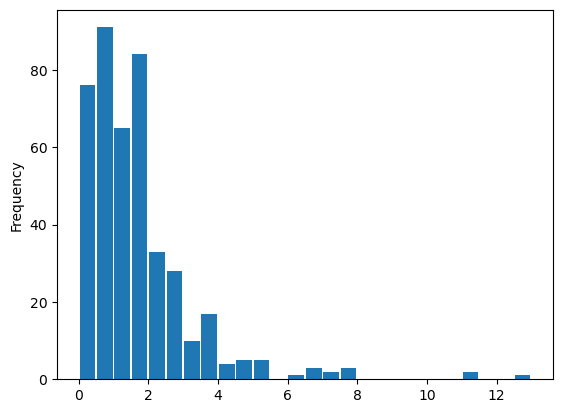

In [211]:
df_raw.distance.plot(kind = 'hist', bins = 26, rwidth = 0.9);

In [213]:
df_raw.accommodationtype.iloc[0]

'_ACCOM_TYPE@Apartment'

In [215]:
df_raw.accommodationtype.iloc[0].split('@')

['_ACCOM_TYPE', 'Apartment']

In [217]:
df_raw.accommodationtype.iloc[0].split('@')[1]

'Apartment'

In [219]:
df_raw['accommodation_type'] = df_raw.accommodationtype.apply(lambda x: x.split('@')[1])

In [221]:
df_raw.accommodation_type.value_counts()

accommodation_type
Hotel                  266
Apartment              124
Pension                 16
Guest House              8
Hostel                   6
Bed and breakfast        4
Apart-hotel              4
Vacation home Condo      2
Name: count, dtype: int64

In [223]:
df_raw.guestreviewsrating.isna().sum()

35

In [225]:
df_raw.guestreviewsrating.iloc[0]

'4.4 /5'

In [227]:
df_raw.guestreviewsrating.iloc[0].split()

['4.4', '/5']

In [229]:
df_raw.guestreviewsrating.iloc[0].split()[0]

'4.4'

In [231]:
isinstance(df_raw.guestreviewsrating.iloc[0].split()[0], str)

True

In [233]:
float(df_raw.guestreviewsrating.iloc[0].split()[0])

4.4

In [235]:
df_raw.guestreviewsrating.value_counts()

guestreviewsrating
4 /5      61
4.1 /5    47
4.5 /5    44
3.7 /5    43
4.3 /5    36
4.4 /5    31
3.5 /5    30
3.9 /5    27
3.2 /5    14
4.8 /5    12
3 /5      12
4.6 /5    10
3.4 /5     6
5 /5       6
2 /5       4
2.2 /5     4
1 /5       3
2.7 /5     2
4.9 /5     2
2.5 /5     1
Name: count, dtype: int64

In [237]:
df_raw['rating'] = df_raw.guestreviewsrating.apply(lambda x: float(x.split()[0]) if isinstance(x, str) else None)

<details><summary>Click for the solution</summary>
    
```python

    df_raw['rating'] = df_raw.guestreviewsrating.apply(lambda x: float(x.split()[0]) if isinstance(x, str) else None)
```

</details>


In [239]:
# Check results
df_raw.rating.value_counts()

rating
4.0    61
4.1    47
4.5    44
3.7    43
4.3    36
4.4    31
3.5    30
3.9    27
3.2    14
4.8    12
3.0    12
4.6    10
3.4     6
5.0     6
2.0     4
2.2     4
1.0     3
2.7     2
4.9     2
2.5     1
Name: count, dtype: int64

In [241]:
df_raw.rating.isna().sum()

35

Rename columns

In [247]:
df_raw.rename(
    columns = {
        "rating2_ta": "ratingta",
        "rating2_ta_reviewcount": "ratingta_count",
        "addresscountryname": "country",
        "s_city": "city",
        "starrating": "stars",
    }, 
    inplace = True
)

In [249]:
df_raw.head()

,country,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,hotel_id,offer,offer_cat,year,month,weekend,holiday,distance,accommodation_type,rating
0,Austria,Vienna,36.0,2.7 miles,City centre,4.4 miles,Donauturm,17. Hernals,81,price for 1 night,...,21894,1,15-50% offer,2017,11,0,0,2.7,Apartment,4.4
1,Austria,Vienna,189.0,1.7 miles,City centre,3.8 miles,Donauturm,17. Hernals,81,price for 1 night,...,21897,1,1-15% offer,2017,11,0,0,1.7,Hotel,3.9
2,Austria,Vienna,53.0,1.4 miles,City centre,2.5 miles,Donauturm,Alsergrund,85,price for 1 night,...,21901,1,15-50% offer,2017,11,0,0,1.4,Hotel,3.7
3,Austria,Vienna,55.0,1.7 miles,City centre,2.5 miles,Donauturm,Alsergrund,83,price for 1 night,...,21902,1,15-50% offer,2017,11,0,0,1.7,Hotel,4.0
4,Austria,Vienna,33.0,1.2 miles,City centre,2.8 miles,Donauturm,Alsergrund,82,price for 1 night,...,21903,1,15-50% offer,2017,11,0,0,1.2,Hotel,3.9


In [251]:
df_raw[['hotel_id', 'neighbourhood',  'distance', 'stars', 'rating', 'ratingta_count', 'accommodation_type',
       'price', 'city']]       

,hotel_id,neighbourhood,distance,stars,rating,ratingta_count,accommodation_type,price,city
0,21894,17. Hernals,2.7,4.0,4.4,216.0,Apartment,81,Vienna
1,21897,17. Hernals,1.7,4.0,3.9,708.0,Hotel,81,Vienna
2,21901,Alsergrund,1.4,4.0,3.7,629.0,Hotel,85,Vienna
3,21902,Alsergrund,1.7,3.0,4.0,52.0,Hotel,83,Vienna
4,21903,Alsergrund,1.2,4.0,3.9,219.0,Hotel,82,Vienna
...,...,...,...,...,...,...,...,...,...
425,22404,Wieden,1.5,3.0,5.0,14.0,Apartment,109,Vienna
426,22406,Wieden,0.8,5.0,4.3,740.0,Hotel,185,Vienna
427,22407,Wieden,1.0,4.0,4.4,1006.0,Hotel,100,Vienna
428,22408,Wieden,1.4,3.0,3.2,135.0,Hotel,58,Vienna


In [253]:
df_raw[['hotel_id', 'neighbourhood',  'distance', 'stars', 'rating', 
        'ratingta_count', 'accommodation_type', 'price', 'city']].to_csv('hotels_vienna_clean.csv')